# TIME SERIES - Conceitos

Time Series ou TS é uma coleção de dados coletados em intervalos de tempo, geralmente constante. Estes dados são tratados e analisados para se prever o futuro ou para derivar alguma outra forma de uso ou para uma análise mais acurada. 

TS se torna diferente de uma regressão por alguns motivos:

* É dependente do tempo . Portanto, a suposição básica de um modelo de regressão linear que as observações são independentes não vale neste caso. 
* Juntamente com uma tendência crescente ou decrescente, a maioria das TS tem alguma forma de tendências de sazonalidade, ou seja, variações específicas de um determinado período de tempo. Por exemplo, as vendas de uma jaqueta de lã ao longo do tempo, invariavelmente terá maiores vendas nas temporadas de inverno.

Tratando uma série temporal como exemplo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm

plt.rcParams ['figure.figsize'] = 15, 6

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importando o dataset

In [2]:
data = pd.read_csv('./dados/AirPassengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

### Observação Importante: a data passada não é lida como uma time serie e sim como um objetc. Assim, é necessário uma transformação (parse) e no formato correto.

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [6]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.keys()

Index(['#Passengers'], dtype='object')

In [8]:
df.shape

(144, 1)

Os comandos passados são:

- 1) **parse_dates** : especifica a coluna que contém as informações de data e hora. O nome da coluna é 'Month'.

- 2) **index_col**: Uma idéia-chave por trás do uso de Pandas para dados TS é que o índice deve ser a variável que descreve as informações de data e hora. Então este argumento diz ao Pandas para usar a coluna 'Month' como índice.

- 3) **date_parser**: especifica uma função que converte uma string de entrada em uma variável datetime. Por padrão, o Pandas lê dados no formato 'AAAA-MM-DD HH: MM: SS'. Se os dados não estiverem nesse formato, o formato deverá ser definido manualmente. Algo parecido com a função de busca de dados definida aqui pode ser usado para este propósito.

Agora os dados têm objeto de tempo como índice e #Passengers como a coluna. Pode-se cruzar o tipo de dados do índice com o seguinte comando:

In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# Determinando uma frequência para os dados

<br>
<img src="img/TS_frequency.jpg">
<br>

Link para a página do jpg com todas as frequências e exemplos:  [link](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

In [10]:
df.groupby([pd.Grouper(freq='3M')]).agg({'#Passengers':sum}).head()

,#Passengers
Month,
1949-01-31,112
1949-04-30,379
1949-07-31,404
1949-10-31,403
1950-01-31,337


In [11]:
teste = df.groupby([pd.Grouper(freq='QS')]).agg({'#Passengers':sum}) #exemplo com quarters

In [12]:
teste.head()

,#Passengers
Month,
1949-01-01,362
1949-04-01,385
1949-07-01,432
1949-10-01,341
1950-01-01,382


# Verificando a estacionariedade da série

A maioria dos modelos de TS trabalham com a ideia de que as séries são estacionárias (média e variância permanecerem constantes ao longo do tempo,  autocovariância que não depende do tempo). Se o comportamento é constante, a probabilidade de repetição deste no futuro é maior e mais previsível.

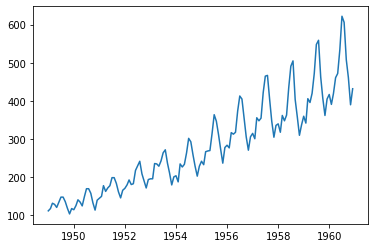

In [13]:
plt.plot(df)

### 1 - Plotando Rollings Statistics (média móvel)

Traçando a média móvel ou a variância móvel e vendo como elas se comportam ao longo de 12 meses

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

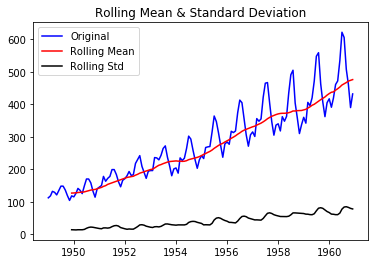

In [15]:
test_stationarity(df)

### 2 - Teste Dickey-Fuller

In [16]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
X = df['#Passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Transformando a time serie em estacionária

A Tendência e a Sazonalidade tornam uma time serie não estacionária.Por isso, é necessário determinar essas duas condições e removê-las da série de datas

### 1 - Aplicando o Log

In [17]:
ts_log = np.log1p(df)

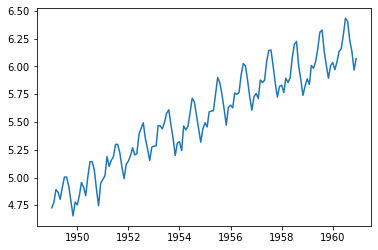

In [18]:
plt.plot(ts_log)

Comparando a não estacionaridade antes do log e depois:

<br>
<img src="img/comparison.png" align="center" width="80%">
<br>

A amplitude da variação foi reduzida. É perceptível que há uma tendência de aumento mas em muitos casos, por causa do ruído, isso não é visíviel facilmente. Existem algumas técnicas para modelar essar tendência:

- Agregação - tomando a média por um período de tempo como médias mensais ou semanais;
- Suavização - tendo médias móveis ;
- Ajuste polinomial - ajuste com um modelo de regressão;

### 2 - Média Móvel (suavização de ruídos)

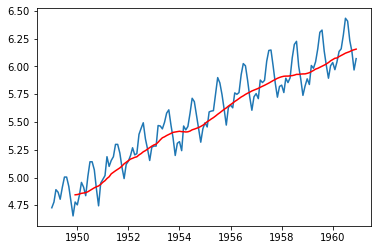

In [19]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Média dos últimos 12 meses dos valores consecutivos de 'k'. A linha vermelha é a média dos rolamentos e será subtraída da série original - não é válido para os primeiros 11 meses da série por não existir tempo (série) suficiente para comparação.

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


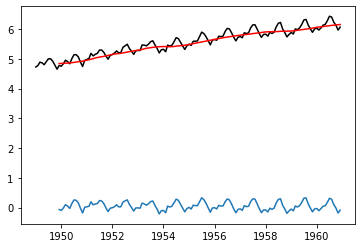

In [21]:
plt.plot(ts_log_moving_avg_diff)
plt.plot(ts_log, color='black')
plt.plot(moving_avg, color='red')

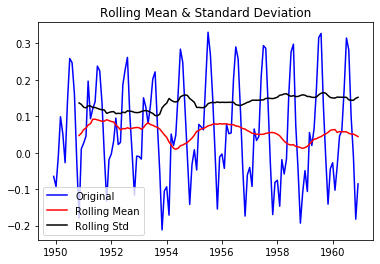

In [22]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Observação: o valor original com log aplicado foi subtraído de sua respectiva média móvel.

In [23]:
ts_log.iloc[11] # 12° valor da TS

#Passengers    4.779123
Name: 1949-12-01 00:00:00, dtype: float64

In [24]:
ts_log.iloc[0:12].sum()/12 # média móvel do 12° valor (média dos 12 primeiros valores)

#Passengers    4.844127
dtype: float64

In [25]:
ts_log.iloc[11] - (ts_log.iloc[0:12].sum()/12) #Obtenção do valor pós retirada da média móvel

#Passengers   -0.065003
dtype: float64

# Diferenciação e Decomposição

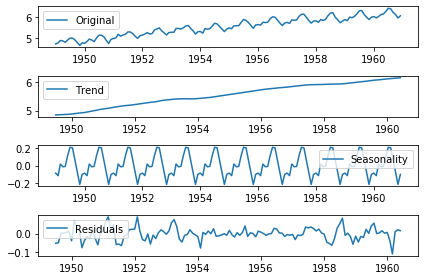

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# ARIMA

ARIMA significa Médias Móveis Integradas Auto-Regressivas (Autoregressive(p) Integrated(d) Moving Averages(q)) . 
<br>
A previsão ARIMA para uma série temporal estacionária nada mais é que uma equação linear (como uma regressão linear). Os preditores dependem dos parâmetros (p, d, q) do modelo ARIMA:
<br>
ARIMA (p, d, q).
<br>
- **AR (p)** - modelo de autorregressão, isto é, regressão da série temporal em si. Premissa básica: os valores da série atual dependem de seus valores anteriores com algum atraso (ou várias defasagens). O atraso máximo no modelo é referido como p. Para determinar o p inicial usaremos o grid search. Isso seria semelhante a considerar que é provável que amanhã será um dia quente caso os últimos três dias tenham sido quentes.

- **I(d)**— ordem de integração. É o número de diferenças não sazonais necessárias para tornar a série estacionária. Como ideia de estacionariedade é razoável supor que esta seja apenas como uma curva "bem comportada", não explosiva, com variância constante e sazonalidade constante.

- **MA (q)** - modelo de média móvel. Modela o erro da série temporal, novamente a suposição é: o erro atual depende do anterior com algum atraso, que é referido como q. Isso seria o mesmo que dizer que amanhã teremos uma temperatura semelhante a de hoje se a diferença entre as temperaturas dos útimos três dias for muito pequena.


### Seleção dos parâmetros p,d, q com um Grid Search e AIC

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
from statsmodels.tsa.stattools import adfuller
import warnings

In [28]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Usando o o SARIMAX para prever (.fit) os ARIMAS sazonais. A diferença entre o ARIMA tradicional e o SARIMAX é o fato deste segundo aplicar o AR, I e MA também na sazonalidade pra poder modelá-la.

O trecho abaixo fará uma iteração para cada uma das combinações mostradas acima considerando o parâmetro order como (p, d, q) e o parametro seasonal_order (P, D, Q, S)  que é especificado para a componente sazonal do modelo ARIMA. Os valores do AIC serão impressos na tela a cada iteração!

In [29]:
warnings.filterwarnings("ignore") 

menor_valor = []

for param in pdq:
     for param_seasonal in seasonal_pdq:
            try:
                mod1 = sm.tsa.statespace.SARIMAX(ts_log,
                                                order=param,
                                                seasonal_order=param_seasonal, 
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results1 = mod1.fit()
                
                print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results1.aic))
                menor_valor.append([results1.aic, param,param_seasonal ])
                
            except:
                continue
                

ARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:898.948202162826
ARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:687.556606338099
ARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-151.84054735993783
ARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-180.29174915758944
ARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-346.1510969792581
ARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-344.3395294534073
ARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-227.03096915466375
ARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-302.5131278911473
ARIMA(0, 0, 1)x(0, 0, 0, 12)7 - AIC:704.2159112494917
ARIMA(0, 0, 1)x(0, 0, 1, 12)7 - AIC:509.3992785060602
ARIMA(0, 0, 1)x(0, 1, 0, 12)7 - AIC:-255.56342223452884
ARIMA(0, 0, 1)x(0, 1, 1, 12)7 - AIC:-249.49111979583657
ARIMA(0, 0, 1)x(1, 0, 0, 12)7 - AIC:-397.79968449844114
ARIMA(0, 0, 1)x(1, 0, 1, 12)7 - AIC:-397.3934918975765
ARIMA(0, 0, 1)x(1, 1, 0, 12)7 - AIC:-272.58502836655924
ARIMA(0, 0, 1)x(1, 1, 1, 12)7 - AIC:-340.5519329595519
ARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-231.2332142664123
ARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-298.0610620244569
ARIMA(0, 

### O melhor parâmetro é o que tem a menor AIC:

In [30]:
min(menor_valor)

[-478.9449334398423, (1, 0, 1), (1, 0, 1, 12)]

In [45]:
order_ = min(menor_valor)[1:2]
order_

[(1, 0, 1)]

In [46]:
seasonal_order_ = min(menor_valor)[2:3]
seasonal_order_

[(1, 0, 1, 12)]

In [33]:
mod = sm.tsa.statespace.SARIMAX(ts_log,
                                order=order_[0],
                                seasonal_order=seasonal_order_[0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9410      0.039     23.850      0.000       0.864       1.018
ma.L1         -0.3791      0.093     -4.075      0.000      -0.561      -0.197
ar.S.L12       1.0200      0.003    309.550      0.000       1.014       1.026
ma.S.L12      -0.5744      0.107     -5.381      0.000      -0.784      -0.365
sigma2         0.0013      0.000      9.242      0.000       0.001       0.002


### Lendo os resultados:

 * coef, mostra o peso (importância) de cada coeficiente e como cada uma impacta na TS;

 * P-value (P>|z|), informa a significância do peso de cada coeficiente. Para esse caso os P-value's tem valores abaixo de 0.05, o que faz com que seja razoável manter todos eles no modelo. 

### Características dos ruídos

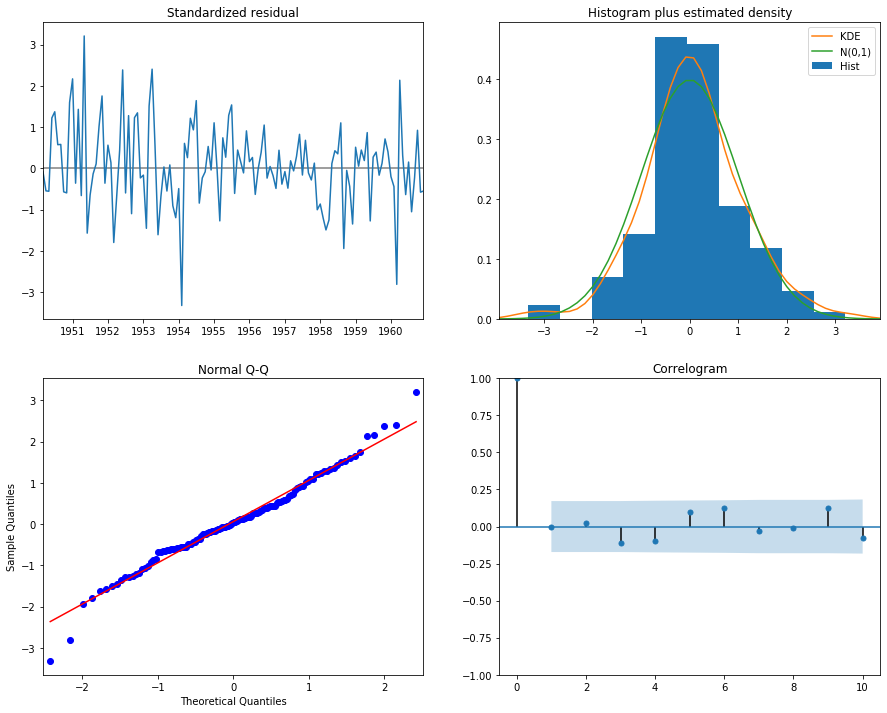

In [35]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### O ruído deve ter um comportamento o mais próximo possível de uma distribuição normal ou média zero, também chamado de white noise. Um modelo precisa ser melhorado quando não apresenta essas características.

 Pelos gráficos, o modelo apresenta as seguintes características:
 
 - Gráfico 1 STANDARDIZED RESIDUAL:Os resíduos não evidenciam nenhuma sazonalidade óbvia o que o torna aparentemente próximo de um white noise. 

- Gráfico 2 HISTOGRAM PLUS ESTIMATED DENSITY: a linha KDE (kernel density estimation) ficou bem próxima à linha de distribuição normal com média zero e desvio padrão igual a 1, o que indica que os resíduos estão normalmente distribuídos.

- Gráfico 3 NORMALQ-Q: a distribuição ordenada dos resíduos segue considerávelmente a linha vermelha, mostrando novamente que os resíduos estão com uma distribuição próxima da normal.

- Gráfico 4 CORRELAGRAM: os resíduos da TS tem correlação baixa com seus lags. O que comprova, também, a leitura do gráfico 1 STANDARDIZED RESIDUAL.

Conclusão: modelo está com um desempenho satisfatório e pode ajudar a fazer o forecast de valores futuros.

# FORECASTING

Indicando a data de início do dataset e garantindo que a previsão será feita com todas as observações anteriores (parâmetro dynamic=False)

In [36]:
pred = results.get_prediction(start=pd.to_datetime('1955-01-01'), dynamic=False)
pred_ci = pred.conf_int()

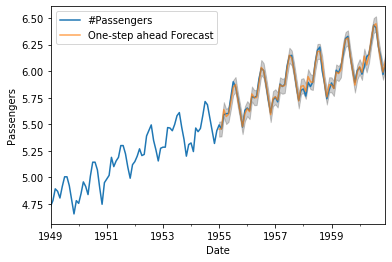

In [37]:
ax = ts_log['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()

plt.show()

### Calculando o erro médio do modelo, MSE (Mean Squared Error)

In [38]:
y_forecasted = pred.predicted_mean
y_truth = ts_log['1955-01-01':]

In [41]:
y_forecasted = pd.DataFrame(y_forecasted).rename(columns = {0:'#Passengers'})

In [42]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is #Passengers    0.0009
dtype: float64


# Analisando o forecast

In [43]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

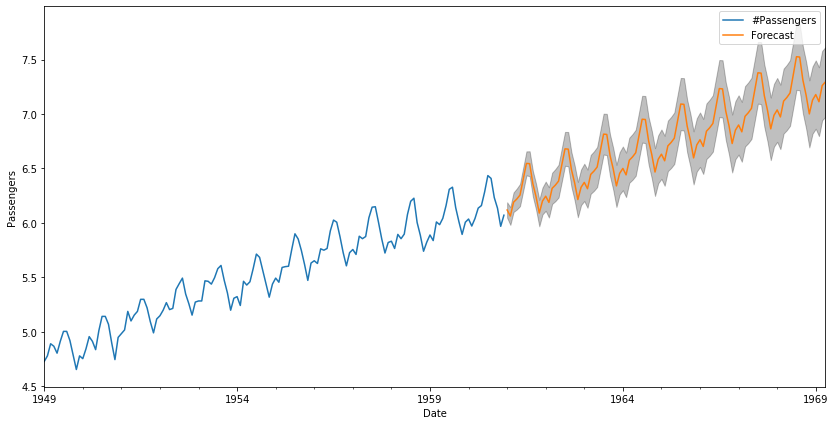

In [44]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts_log.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()